In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format
%matplotlib inline



In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
interactions=pd.read_csv("goodreads_interactions.csv")

In [4]:
# Let's look at the first 5 rows of the dataset
interactions.head()

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0


In [5]:
interactions.columns

Index(['user_id', 'book_id', 'is_read', 'rating', 'is_reviewed'], dtype='object')

In [6]:
#Extracting information on type of the attributes
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228648342 entries, 0 to 228648341
Data columns (total 5 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int64
 1   book_id      int64
 2   is_read      int64
 3   rating       int64
 4   is_reviewed  int64
dtypes: int64(5)
memory usage: 8.5 GB


In [7]:
# Checking for duplicate user_id and book_id pairs
interactions[interactions.duplicated(['user_id','book_id'], keep=False)]

,user_id,book_id,is_read,rating,is_reviewed


The output above means that we don't have any duplicate user_id and book_id pairs. So, Let us now check for missing values if any.

In [8]:
#Checking if we have any missing values
interactions.isnull().any()

user_id        False
book_id        False
is_read        False
rating         False
is_reviewed    False
dtype: bool

There are no missing values which is great! We can now look at the basic statistics of the dataset to get further insights

In [9]:
#total number of records in this dataframe
interactions.shape[0]

228648342

In [10]:
#The number of records where the book has been read by the users
interactions['is_read'].sum()

112131203

In [11]:
# displaying the number of records where the books have been rated by users
print((interactions['rating']>0).sum())

104551549


In [12]:
#total number of records where the books have been reviewed by users
interactions['is_reviewed'].sum()

16219149

In [13]:
#Number of records where the rating has been provided, here '0' in the output means that no rating has been given to the book by the user
count_rating= interactions['rating'].value_counts()
print(count_rating)

0    124096793
4     37497451
5     35506166
3     23307457
2      6189946
1      2050529
Name: rating, dtype: int64


Now that we have seen the basic stats of the dataframe, let us know look at the interactions of each user with each action i.e, read, review and rate

In [14]:
user_shelf = interactions['user_id'].value_counts().value_counts().reset_index().sort_values('index').values
user_read = interactions['user_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
user_rating = interactions['user_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
user_reviews = interactions['user_id'].loc[interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values


Plotting a log-log plot to visualize the interactions between users and actions

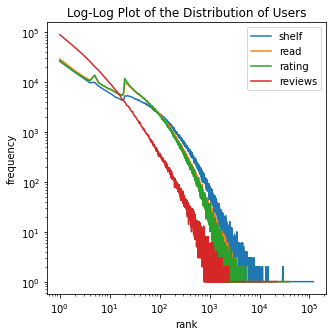

In [15]:
plt.figure(figsize=(5,5))
plt.loglog(user_shelf[:,0], user_shelf[:,1], label='shelf')
plt.loglog(user_read[:,0], user_read[:,1], label='read')
plt.loglog(user_rating[:,0], user_rating[:,1], label='rating')
plt.loglog(user_reviews[:,0], user_reviews[:,1], label='reviews')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Users')
plt.legend(loc='upper right')

From the above plot, we can see that users have mostly reviewed the books than rating and reading.

Reference for the plots: https://github.com/MengtingWan/goodreads/

Let us now visualize the interactions of books with the actions performed by the users i.e, books that are read, reviewed, shelved, and rated.

In [16]:
book_shelf = interactions['book_id'].value_counts().value_counts().reset_index().sort_values('index').values
book_read = interactions['book_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
book_rating = interactions['book_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
book_reviews = interactions['book_id'].loc[interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

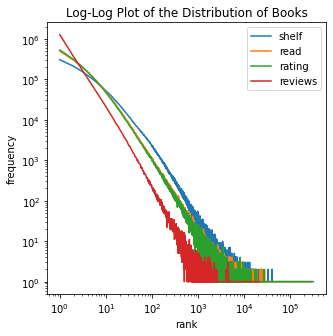

In [17]:
plt.figure(figsize=(5,5))
plt.loglog(book_shelf[:,0], book_shelf[:,1], label='shelf')
plt.loglog(book_read[:,0], book_read[:,1], label='read')
plt.loglog(book_rating[:,0], book_rating[:,1], label='rating')
plt.loglog(book_reviews[:,0], book_reviews[:,1], label='reviews')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Books')
plt.legend(loc='upper right')

The log-log plot of the distribution of books shows us that most books have been reviewed by the users.

In [18]:
# Let us now extract all the unique user ids
all_user_id = interactions.user_id.unique()

In [19]:
# Let's check the user id with index 5
all_user_id[5]

5

In [20]:
# importing tqdm library to get the progess of the python code
from tqdm import tqdm

In [ ]:
#here, we are creating a database of baskets of all the books a user reads
db = []
for user in tqdm(all_user_id):
    db.append(list(interactions[interactions.user_id==user]['book_id'].values))
    

  1%|▍                                                                        | 5814/876145 [13:02<31:46:34,  7.61it/s]

In [ ]:
db

In [ ]:
# importing prefixspan library
from prefixspan import PrefixSpan

In [ ]:
#implementing prefixspan on the database we created
ps = PrefixSpan(db)

In [ ]:
# finding the frequent sequences with min_support = 5 
freq_seq = ps.frequent(5)

In [ ]:
import pickle

with open('freq_seq.pckle', 'wb') as f:
    pickle.dump(freq_seq, f)

In [60]:
# finding the top k frequent subsequence patterns
ps.topk(50)

[(30, [536]),
 (29, [943]),
 (27, [862]),
 (23, [939]),
 (23, [1386]),
 (23, [1387]),
 (22, [858]),
 (21, [536, 1387]),
 (21, [613]),
 (21, [938]),
 (21, [941]),
 (21, [943, 941]),
 (20, [536, 1386]),
 (20, [943, 939]),
 (20, [944]),
 (20, [1473]),
 (19, [943, 938]),
 (19, [943, 968]),
 (19, [968]),
 (19, [996]),
 (19, [999]),
 (19, [1574]),
 (18, [461]),
 (18, [821]),
 (17, [943, 944]),
 (17, [1000]),
 (17, [1402]),
 (16, [772]),
 (16, [786]),
 (16, [941, 939]),
 (16, [943, 613]),
 (16, [943, 941, 939]),
 (16, [997]),
 (16, [1387, 1386]),
 (15, [197]),
 (15, [536, 1387, 1386]),
 (15, [670]),
 (15, [938, 939]),
 (15, [1011]),
 (15, [1012]),
 (15, [1211]),
 (15, [1233]),
 (14, [255]),
 (14, [524]),
 (14, [739]),
 (14, [839]),
 (14, [938, 944]),
 (14, [941, 938]),
 (14, [943, 941, 938]),
 (14, [1004])]

A pattern is said to be closed if there are no super-sequence pattern with same frequency. Closed patterns are much more compact due to small numbers.

In [61]:
#displaying closed frequent patterns and top k closed patterns. 
print(ps.frequent(5, closed=True))
print("the top sub-sequence patterns are:" ,ps.topk(50, closed=True))

[(6, [947]), (20, [944]), (5, [944, 941]), (13, [944, 939]), (6, [944, 939, 772]), (7, [944, 862]), (8, [944, 858]), (8, [944, 772]), (6, [944, 739]), (5, [944, 670]), (6, [944, 613]), (5, [944, 536]), (6, [944, 255]), (5, [944, 66]), (5, [944, 43]), (5, [944, 1203]), (6, [944, 1004]), (5, [944, 997]), (29, [943]), (21, [943, 941]), (16, [943, 941, 939]), (6, [943, 941, 939, 858]), (5, [943, 941, 939, 772]), (5, [943, 941, 939, 255]), (5, [943, 941, 939, 66]), (6, [943, 941, 939, 968]), (14, [943, 941, 938]), (6, [943, 941, 938, 858]), (5, [943, 941, 938, 772]), (5, [943, 941, 938, 255]), (11, [943, 941, 938, 944]), (7, [943, 941, 938, 944, 968]), (8, [943, 941, 938, 944, 939]), (5, [943, 941, 938, 944, 939, 968]), (5, [943, 941, 938, 944, 1387]), (5, [943, 941, 938, 944, 858]), (8, [943, 941, 938, 968]), (11, [943, 941, 938, 939]), (5, [943, 941, 938, 939, 1387]), (5, [943, 941, 892]), (6, [943, 941, 862]), (8, [943, 941, 858]), (6, [943, 941, 821]), (5, [943, 941, 786]), (7, [943, 94

the top sub-sequence patterns are: [(30, [536]), (29, [943]), (27, [862]), (23, [939]), (23, [1386]), (23, [1387]), (22, [858]), (21, [536, 1387]), (21, [613]), (21, [938]), (21, [943, 941]), (20, [536, 1386]), (20, [943, 939]), (20, [944]), (20, [1473]), (19, [943, 938]), (19, [943, 968]), (19, [996]), (19, [999]), (19, [1574]), (18, [461]), (18, [821]), (17, [943, 944]), (17, [1000]), (17, [1402]), (16, [772]), (16, [786]), (16, [943, 613]), (16, [943, 941, 939]), (16, [997]), (16, [1387, 1386]), (15, [197]), (15, [536, 1387, 1386]), (15, [670]), (15, [938, 939]), (15, [1011]), (15, [1012]), (15, [1211]), (15, [1233]), (14, [255]), (14, [524]), (14, [739]), (14, [839]), (14, [938, 944]), (14, [943, 941, 938]), (14, [1004]), (14, [1203]), (14, [1471]), (13, [943, 941, 968]), (13, [944, 939])]


A pattern is said to be a generator pattern if there is no sub-pattern with same frequency. Generator patterns are highly compact due small numbers and shorter lengths. Due to which these patterns are mainly used in tasks like classification etc.

In [62]:
#Displaying generator frequent and top k patterns 
print(ps.frequent(5, generator=True))
print(ps.topk(50, generator=True))

[(6, [947]), (20, [944]), (5, [944, 941]), (13, [944, 939]), (6, [944, 939, 772]), (7, [944, 939, 968]), (5, [944, 939, 1387]), (7, [944, 862]), (8, [944, 858]), (8, [944, 772]), (6, [944, 739]), (5, [944, 670]), (6, [944, 613]), (5, [944, 536]), (6, [944, 255]), (5, [944, 66]), (5, [944, 43]), (11, [944, 968]), (5, [944, 968, 772]), (5, [944, 968, 1387]), (5, [944, 1555]), (8, [944, 1387]), (5, [944, 1387, 1386]), (5, [944, 1203]), (7, [944, 1386]), (6, [944, 1004]), (5, [944, 999]), (5, [944, 12923]), (5, [944, 997]), (5, [944, 7212]), (29, [943]), (20, [943, 939]), (5, [943, 939, 938]), (5, [943, 939, 862]), (7, [943, 939, 858]), (6, [943, 939, 821]), (7, [943, 939, 772]), (6, [943, 939, 739]), (5, [943, 939, 706]), (6, [943, 939, 613]), (5, [943, 939, 255]), (5, [943, 939, 1203]), (5, [943, 939, 999]), (9, [943, 939, 968]), (7, [943, 939, 1387]), (6, [943, 939, 1386]), (5, [943, 939, 944]), (19, [943, 938]), (6, [943, 938, 862]), (7, [943, 938, 858]), (5, [943, 938, 821]), (6, [943

[(30, [536]), (29, [943]), (27, [862]), (23, [939]), (23, [1386]), (23, [1387]), (22, [858]), (21, [536, 1387]), (21, [613]), (21, [938]), (21, [941]), (20, [536, 1386]), (20, [943, 939]), (20, [944]), (20, [1473]), (19, [943, 938]), (19, [968]), (19, [996]), (19, [999]), (19, [1574]), (18, [461]), (18, [821]), (17, [943, 944]), (17, [1000]), (17, [1402]), (16, [772]), (16, [786]), (16, [941, 939]), (16, [943, 613]), (16, [997]), (16, [1387, 1386]), (15, [197]), (15, [536, 1387, 1386]), (15, [670]), (15, [938, 939]), (15, [1011]), (15, [1012]), (15, [1211]), (15, [1233]), (14, [255]), (14, [524]), (14, [739]), (14, [839]), (14, [938, 944]), (14, [941, 938]), (14, [1004]), (14, [1203]), (14, [1471]), (13, [943, 938, 939]), (13, [944, 939])]


Now that we have generated the frequent patterns and top k patterns, we will now draw the association rules to mine these frequent patterns and help us get the recommendation of books for the users.

Here, we are recommending books in two ways, 
1: Using association rules to get recommendations for frequent itemsets generated                                                  using fp-growth.                                             
2: Generating recommendations for prefixspan generated frequent patterns.

In [63]:
#importing TransactioEncoder and fpgrowth from mlxtend library
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [64]:
te = TransactionEncoder()
te_ary = te.fit(db).transform(db)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [65]:
#Generating frequent itemsets using fpgrowth
frequent_itemsets = fpgrowth(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.5882352941176471,(536)
1,0.5686274509803921,(943)
2,0.5294117647058824,(862)
3,0.45098039215686275,(939)
4,0.43137254901960786,(858)
...,...,...
148,0.4117647058823529,"(536, 1386)"
149,0.3137254901960784,"(1386, 943)"
150,0.37254901960784315,"(536, 1386, 1387)"
151,0.3137254901960784,"(536, 1386, 943)"


In [66]:
#Generating association rules using association_rules library for the generated frequent itemsets using fp-growth
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(536),(943),0.5882352941176471,0.5686274509803921,0.43137254901960786,0.7333333333333334,1.2896551724137932,0.09688581314878897,1.6176470588235299
1,(943),(536),0.5686274509803921,0.5882352941176471,0.43137254901960786,0.7586206896551725,1.2896551724137932,0.09688581314878897,1.7058823529411768
2,(862),(943),0.5294117647058824,0.5686274509803921,0.4117647058823529,0.7777777777777777,1.3678160919540228,0.11072664359861589,1.9411764705882346
3,(943),(862),0.5686274509803921,0.5294117647058824,0.4117647058823529,0.7241379310344828,1.367816091954023,0.11072664359861589,1.7058823529411764
4,(536),(862),0.5882352941176471,0.5294117647058824,0.37254901960784315,0.6333333333333333,1.1962962962962962,0.06113033448673588,1.283422459893048
...,...,...,...,...,...,...,...,...,...
1060,"(536, 1386)",(943),0.4117647058823529,0.5686274509803921,0.3137254901960784,0.761904761904762,1.3399014778325125,0.07958477508650522,1.8117647058823536
1061,"(536, 943)",(1386),0.43137254901960786,0.45098039215686275,0.3137254901960784,0.7272727272727272,1.6126482213438733,0.11918492887351018,2.013071895424836
1062,"(1386, 943)",(536),0.3137254901960784,0.5882352941176471,0.3137254901960784,1.0,1.7,0.12918108419838523,inf
1063,(1386),"(536, 943)",0.45098039215686275,0.43137254901960786,0.3137254901960784,0.6956521739130435,1.6126482213438733,0.11918492887351018,1.868347338935574


In [67]:
#Generating association rules uing metric 'lift' and setting our min_threshold to 1.5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules





,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(939),(943),0.45098039215686275,0.5686274509803921,0.43137254901960786,0.9565217391304348,1.6821589205397303,0.17493271818531336,9.921568627450988
1,(943),(939),0.5686274509803921,0.45098039215686275,0.43137254901960786,0.7586206896551725,1.6821589205397303,0.17493271818531336,2.2745098039215694
2,"(536, 939)",(943),0.3333333333333333,0.5686274509803921,0.3333333333333333,1.0,1.7586206896551724,0.1437908496732026,inf
3,"(536, 943)",(939),0.43137254901960786,0.45098039215686275,0.3333333333333333,0.7727272727272726,1.7134387351778653,0.13879277201076506,2.415686274509803
4,(939),"(536, 943)",0.45098039215686275,0.43137254901960786,0.3333333333333333,0.7391304347826086,1.7134387351778655,0.13879277201076506,2.1797385620915026
...,...,...,...,...,...,...,...,...,...
1057,(1387),"(536, 1386)",0.45098039215686275,0.4117647058823529,0.37254901960784315,0.8260869565217391,2.0062111801242235,0.18685121107266436,3.382352941176471
1058,"(536, 943)",(1386),0.43137254901960786,0.45098039215686275,0.3137254901960784,0.7272727272727272,1.6126482213438733,0.11918492887351018,2.013071895424836
1059,"(1386, 943)",(536),0.3137254901960784,0.5882352941176471,0.3137254901960784,1.0,1.7,0.12918108419838523,inf
1060,(536),"(1386, 943)",0.5882352941176471,0.3137254901960784,0.3137254901960784,0.5333333333333333,1.7,0.12918108419838523,1.4705882352941175


In [72]:
rules.to_pickle('rules.pkle')

In [69]:
#function to convert the rules generated to dictionary
def convert_df(rules):
    '''
    Convert df to dict for easy processing
    :param rules_df: df read from csv
    :return: dict of rules
    '''
    rules_dict = {}
    for i in rules.values:
        ante = i[0]
        ante_parsed = re.findall(r"\d{1,}", str(ante))
        conse = i[1]
        conse_parsed = re.findall(r"\d{1,}", str(conse))

        #Account for duplicate ante
        if tuple(ante_parsed) in rules_dict:
            rules_dict[tuple(ante_parsed)].append(tuple(conse_parsed))
        else:
            rules_dict[tuple(ante_parsed)] = [tuple(conse_parsed)]
    return rules_dict


In [70]:
#function to generate suggestions
def gen_suggestions(read_book):
    '''
    Generate suggestions
    :param book_read: user read books as a list
    :return: list of suggestions
    '''
    read_books = set(read_book)
    suggestions = set()
    for ante,conse in rules_dict.items():
        if set(ante).issubset(read_books):
            for co in conse:
                added = set([i for i in co if i not in read_books ])
                suggestions.update(added)
    return suggestions